# Car Brand Classifiaction

This is done by transfer learning

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

from tensorflow.keras.applications.inception_resnet_v2  import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [5]:
# Import the InceptionResNetV2 library as shown below and add preprocessing layer to the front of InceptionResNetV2
# Here we will be using imagenet weights

incep = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




219062272/219055592 [==============================] - 112s 1us/step


In [6]:
incep.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

batch_normalization_197 (BatchN (None, 5, 5, 224)    672         conv2d_197[0][0]                 
__________________________________________________________________________________________________
activation_197 (Activation)     (None, 5, 5, 224)    0           batch_normalization_197[0][0]    
__________________________________________________________________________________________________
conv2d_195 (Conv2D)             (None, 5, 5, 192)    399360      block8_8_ac[0][0]                
__________________________________________________________________________________________________
conv2d_198 (Conv2D)             (None, 5, 5, 256)    172032      activation_197[0][0]             
__________________________________________________________________________________________________
batch_normalization_195 (BatchN (None, 5, 5, 192)    576         conv2d_195[0][0]                 
__________________________________________________________________________________________________
batch_norm

In [8]:
# don't train existing weights
for layer in incep.layers:
    layer.trainable = False

In [10]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [11]:
# our layers - you can add more if you want
x = Flatten()(incep.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=incep.input, outputs=prediction)

In [15]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

Total params: 54,451,939
Trainable params: 115,203
Non-trainable params: 54,336,736
__________________________________________________________________________________________________


In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [19]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [21]:
len(training_set)

2

In [23]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
2/2 [==============================] - 18s 9s/step - loss: 9.4078 - accuracy: 0.3281 - val_loss: 5.0154 - val_accuracy: 0.6034
Epoch 2/50
2/2 [==============================] - 8s 6s/step - loss: 4.5496 - accuracy: 0.5469 - val_loss: 3.2523 - val_accuracy: 0.7586
Epoch 3/50
2/2 [==============================] - 8s 6s/step - loss: 4.7508 - accuracy: 0.6250 - val_loss: 2.2241 - val_accuracy: 0.7931
Epoch 4/50
2/2 [==============================] - 8s 6s/step - loss: 1.8771 - accuracy: 0.7500 - val_loss: 3.0732 - val_accuracy: 0.6207
Epoch 5/50
2/2 [==============================] - 10s 7s/step - loss: 2.3128 - accuracy: 0.7031 - val_loss: 4.4607 - val_accuracy: 0.6034
Epoch 6/50
2/2 [==============================] - 9s 7s/step - loss: 2.7788 - accuracy: 0.7188 - val_loss: 2.6043 - val_accuracy: 0.6034
Epoch 7/50
2/2 [==============================] - 10s 7s/step - loss: 0.8709 - accuracy: 0.8125 - val_loss: 3.5830 - val_accuracy: 0.5000
Epoch 8/50
2/2 [======================

In [30]:
r.history

{'loss': [9.40782356262207,
  4.549592018127441,
  4.7507734298706055,
  1.8770544528961182,
  2.3127822875976562,
  2.7787792682647705,
  0.870856523513794,
  1.793071985244751,
  1.5524146556854248,
  1.2862846851348877,
  1.256178617477417,
  0.9041951894760132,
  0.10650485754013062,
  0.3501202464103699,
  0.3308398425579071,
  0.3799632787704468,
  0.023095279932022095,
  0.06219401955604553,
  0.09914392232894897,
  0.07682199776172638,
  0.0998738706111908,
  0.18149355053901672,
  0.02218003198504448,
  0.013250244781374931,
  0.0372442863881588,
  0.021419713273644447,
  0.004449293948709965,
  0.032156944274902344,
  0.0032043340615928173,
  0.012570935301482677,
  0.016160445287823677,
  0.042013607919216156,
  0.022636424750089645,
  0.021072378382086754,
  0.00018981161701958627,
  0.00010435903823236004,
  0.00022664861171506345,
  0.0035404865629971027,
  0.004164058715105057,
  0.0005321016069501638,
  0.00025863770861178637,
  0.0010860980255529284,
  0.04096727818250

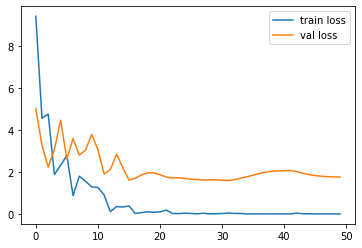

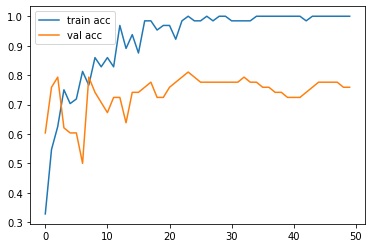

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [31]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [25]:

y_pred = model.predict(test_set)


In [26]:
y_pred

array([[5.91212165e-06, 1.74325044e-19, 9.99994040e-01],
       [3.21704984e-01, 5.32674086e-16, 6.78295016e-01],
       [3.76696563e-10, 1.00000000e+00, 2.17332239e-14],
       [1.37176746e-17, 1.00000000e+00, 7.53039565e-15],
       [4.88229945e-09, 1.00000000e+00, 8.95465591e-10],
       [7.62463515e-09, 9.99999762e-01, 2.93030553e-07],
       [1.11502764e-07, 9.99999881e-01, 4.00301292e-10],
       [1.00114127e-15, 1.00000000e+00, 8.33416859e-14],
       [6.73985694e-12, 1.00000000e+00, 1.76368520e-08],
       [1.95893925e-04, 7.52760530e-01, 2.47043610e-01],
       [9.99105394e-01, 2.47315597e-06, 8.92103591e-04],
       [6.35335766e-07, 9.99999404e-01, 1.79717852e-10],
       [4.02256082e-14, 2.05280889e-35, 1.00000000e+00],
       [3.32033678e-10, 1.00000000e+00, 1.69187206e-10],
       [9.61901634e-08, 9.99999881e-01, 1.05968434e-09],
       [3.75195531e-15, 1.00000000e+00, 8.12796214e-15],
       [9.99987960e-01, 1.09261937e-05, 1.05906111e-06],
       [1.61665012e-05, 4.42038

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 2, 1], dtype=int64)

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [33]:
model=load_model('model_resnet50.h5')

In [66]:
img=image.load_img('Datasets/Test/mercedes/31.jpg',target_size=(224,224))

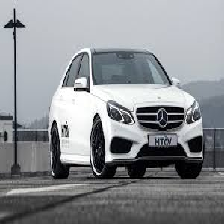

In [67]:
img

In [68]:
x=image.img_to_array(img)
x

array([[[196., 199., 204.],
        [196., 199., 204.],
        [196., 199., 204.],
        ...,
        [196., 199., 206.],
        [196., 199., 206.],
        [196., 199., 206.]],

       [[196., 199., 204.],
        [196., 199., 204.],
        [196., 199., 204.],
        ...,
        [196., 199., 206.],
        [196., 199., 206.],
        [196., 199., 206.]],

       [[196., 199., 204.],
        [196., 199., 204.],
        [196., 199., 204.],
        ...,
        [196., 199., 206.],
        [196., 199., 206.],
        [196., 199., 206.]],

       ...,

       [[ 37.,  37.,  37.],
        [ 32.,  32.,  32.],
        [ 30.,  30.,  30.],
        ...,
        [ 61.,  61.,  61.],
        [ 61.,  61.,  61.],
        [ 61.,  61.,  61.]],

       [[ 37.,  37.,  37.],
        [ 32.,  32.,  32.],
        [ 30.,  30.,  30.],
        ...,
        [ 61.,  61.,  61.],
        [ 61.,  61.,  61.],
        [ 61.,  61.,  61.]],

       [[ 42.,  42.,  42.],
        [ 36.,  36.,  36.],
        [ 34.,  

In [69]:
x.shape

(224, 224, 3)

In [70]:
x=x/255

In [71]:
x

array([[[0.76862746, 0.78039217, 0.8       ],
        [0.76862746, 0.78039217, 0.8       ],
        [0.76862746, 0.78039217, 0.8       ],
        ...,
        [0.76862746, 0.78039217, 0.80784315],
        [0.76862746, 0.78039217, 0.80784315],
        [0.76862746, 0.78039217, 0.80784315]],

       [[0.76862746, 0.78039217, 0.8       ],
        [0.76862746, 0.78039217, 0.8       ],
        [0.76862746, 0.78039217, 0.8       ],
        ...,
        [0.76862746, 0.78039217, 0.80784315],
        [0.76862746, 0.78039217, 0.80784315],
        [0.76862746, 0.78039217, 0.80784315]],

       [[0.76862746, 0.78039217, 0.8       ],
        [0.76862746, 0.78039217, 0.8       ],
        [0.76862746, 0.78039217, 0.8       ],
        ...,
        [0.76862746, 0.78039217, 0.80784315],
        [0.76862746, 0.78039217, 0.80784315],
        [0.76862746, 0.78039217, 0.80784315]],

       ...,

       [[0.14509805, 0.14509805, 0.14509805],
        [0.1254902 , 0.1254902 , 0.1254902 ],
        [0.11764706, 0

In [72]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [73]:
model.predict(img_data)

array([[6.6778944e-06, 1.5484251e-03, 9.9844497e-01]], dtype=float32)

In [74]:
a=np.argmax(model.predict(img_data), axis=1)

In [75]:
a

array([2], dtype=int64)